Osnabrück University - Computer Vision (Winter Term 2016/17) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 05: Segmentation 2

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 11, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Periodic functions) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What are periodic functions? Can you provide a definition?

**b)** What are *amplitude*, *frequency*, *wave length*, and *phase* of a sine function? How can you change these properties?

**c)** How are sine and cosine defined for complex arguments? In what sense does this generalize the real case?

## Assignment 1: Multiscale representation [8 Points]

**a)** What is a *scale space*? What is a multiscale representation? What is the motivation for a multiscale strategy in the context of segmentation?

In order to extend the homogeneity condition from local to global decisions, i.e., from low-level features such as color and texture to high-level concepts such as water, buildings, sky, multiscale strategy is needed. This is also necessary for avoiding chaining, i.e., detecting globally inhomogeneous segments which are locally homogeneous. The idea behind this strategy is that different structures/segments show up in the same pattern on different scales, i.e., different levels of detail/resolution.

A scale space is the concept that arises under continuous scaling parameter, i.e., under the generalization of this strategy from the discrete case to the continous case.

**b)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

A Gaussian pyramid is the object constructed using multiscale representation of an image that has been Gaussian filtered before reduction at each scale step.

Under the reduce operation, each pixel of the next level, i+1, replaces four pixels of the current level, i (it's not necessary for this particular pixel to be calculated based on only these 4 pixels).

Low pass filtering further smoothes out the image so that the reduced image doesn't contain jumps in gray value continuity. This way the resulting image looks more fluid.

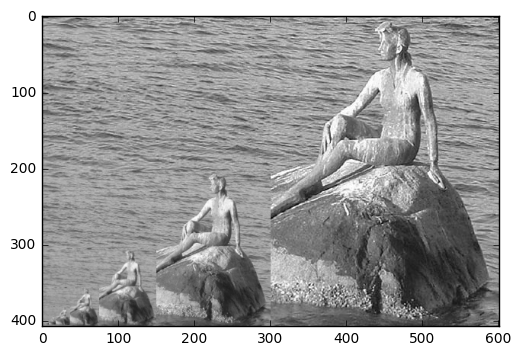

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

img = misc.imread('mermaid.png', mode='F')

pyramid_image = img

def half(img):
    x,y = img.shape
    x_half = int(x/2)
    y_half = int(y/2)
    half_img = np.zeros((x_half,y_half))
    gaussian = gaussian_filter(img,1)
    for i in range(x_half):
        for j in range(y_half):
            half_img[i][j] = gaussian[2*i][2*j]
    if (x_half>1 and y_half>1):
        half(half_img)
    for i in range(x_half):
        for j in range(y_half):
            img[x_half+i][j] = half_img[i][j]

half(pyramid_image)


       


plt.gray()
plt.imshow(pyramid_image)
plt.show()

**c)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

Expand operation reproduces lower level i from upper level i+1 by interpolation. The resultig image is blurred because the reduce operation cannot be inverted. The reason for this is that the reduction results in loss of information as the image matrix is collapsed into a lower-rank matrix.

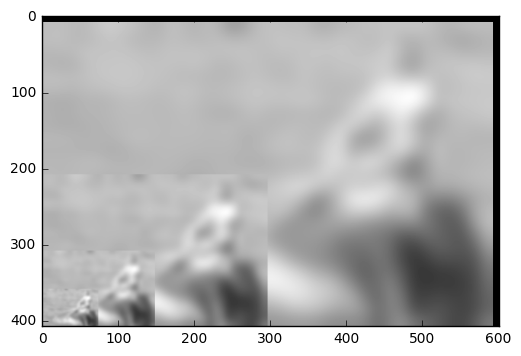

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

img = misc.imread('mermaid.png', mode='F')

pyramid_image = np.zeros(img.shape)

def half(img):
    x,y = img.shape
    x_half = int(x/2)
    y_half = int(y/2)
    half_img = np.zeros((x_half,y_half))
    gaussian = gaussian_filter(img,1)
    for i in range(x_half):
        for j in range(y_half):
            half_img[i][j] = gaussian[2*i][2*j]
    return half_img

input_img = img

n=5

while n>1:
    n-=1
    input_img = half(input_img)
    
x_img, y_img = img.shape

def double(img, pyramid_image):
    x,y = img.shape
    x_double = 2*x
    y_double = 2*y
    double_img = np.zeros((x_double,y_double))
    for i in range(x):
        for j in range(y):
            double_img[2*i][2*j] = img[i][j]
            double_img[2*i+1][2*j] = img[i][j]
            double_img[2*i][2*j+1] = img[i][j]
            double_img[2*i+1][2*j+1] = img[i][j]
    double_img = gaussian_filter(double_img,1)
    if (2*x_double<=x_img and 2*y_double<=y_img):
        double(double_img, pyramid_image)
    for i in range(x_double):
        for j in range(y_double):
            pyramid_image[i-x_double+1][j] = double_img[i][j]            

double(input_img, pyramid_image)


plt.gray()
plt.imshow(pyramid_image)
plt.show()

**d)** What is the *Laplacian pyramid*? What is it used for? Compute the Laplacian pyramid and generate an image similar to the one on (CV-07 slide 36).

Laplacian pyramid is the representation of gray values edges on different scales. It is used for identifying the scales at which different edges occur.

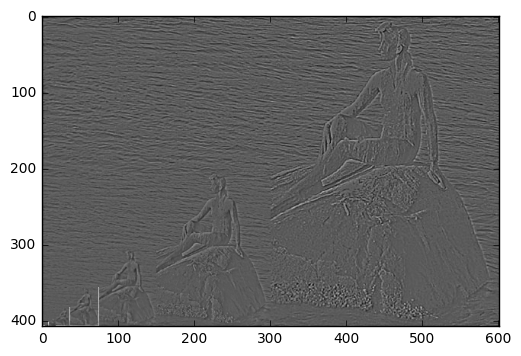

In [3]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

img = misc.imread('mermaid.png', mode='F')

def double(img):
    x,y = img.shape
    x_double = 2*x
    y_double = 2*y
    double_img = np.zeros((x_double,y_double))
    for i in range(x):
        for j in range(y):
            double_img[2*i][2*j] = img[i][j]
            double_img[2*i+1][2*j] = img[i][j]
            double_img[2*i][2*j+1] = img[i][j]
            double_img[2*i+1][2*j+1] = img[i][j]
    double_img = gaussian_filter(double_img,1)
    return double_img

def laplacian_pyramid(img):
    x,y = img.shape
    x_half = int(x/2)
    y_half = int(y/2)
    half_img = np.zeros((x_half,y_half))
    gaussian = gaussian_filter(img,1)
    for i in range(x_half):
        for j in range(y_half):
            half_img[i][j] = gaussian[2*i][2*j]
    new = double(half_img)
    x_new, y_new = new.shape
    dx = x - x_new
    dy = y - y_new
    lapimg = img-np.pad(new,((0,dx),(0,dy)),'constant')
    if (x_half>1 and y_half>1):
        for i in range(x_half,x):
            for j in range(y_half):
                lapimg[i][j] = 0
        halflap = laplacian_pyramid(half_img)
        x_hl, y_hl = halflap.shape
        dxhl = x - x_hl
        dyhl = y - y_hl
        return lapimg + np.pad(halflap,((dxhl,0),(0,dyhl)),'constant')
    else:
        return lapimg

pyramid_image = laplacian_pyramid(img)


plt.gray()
plt.imshow(pyramid_image)
plt.show()

## Assignment 2: Texture Segmentation [6 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

Texture is the pattern of a surface. Texture results from the commonality in a neighborhood of pixels and non-strict periodicity from neighborhood to neighborhood. There is no standard definition of texture, as the concept cannot be stated explicitly in a manner that can cover the large range of possible texture measures

When using texture features as a homogeneity condition in segmentation, for inhomogeneous groups of pixels region assignment is problematic.

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

Co-occurenece matrix is a two-dimensional histogram based on pairs of pixels. Each point on the histogram denotes the frequency of two gray image value combination accross a specified distance. Texture features after Haralick can be extracted from the co-occurrence matrix.

**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

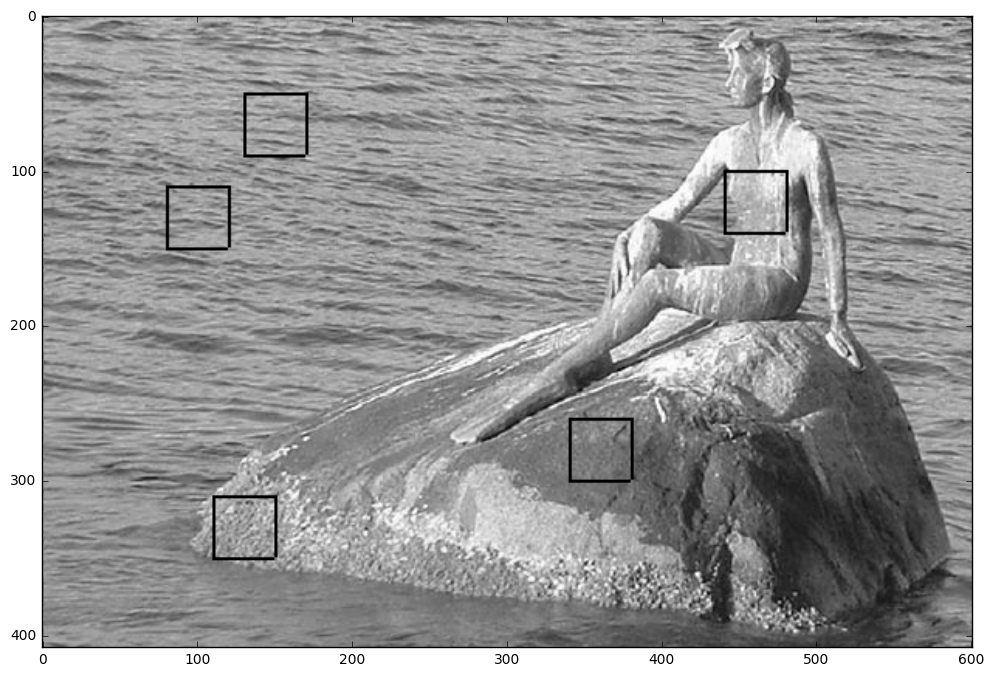

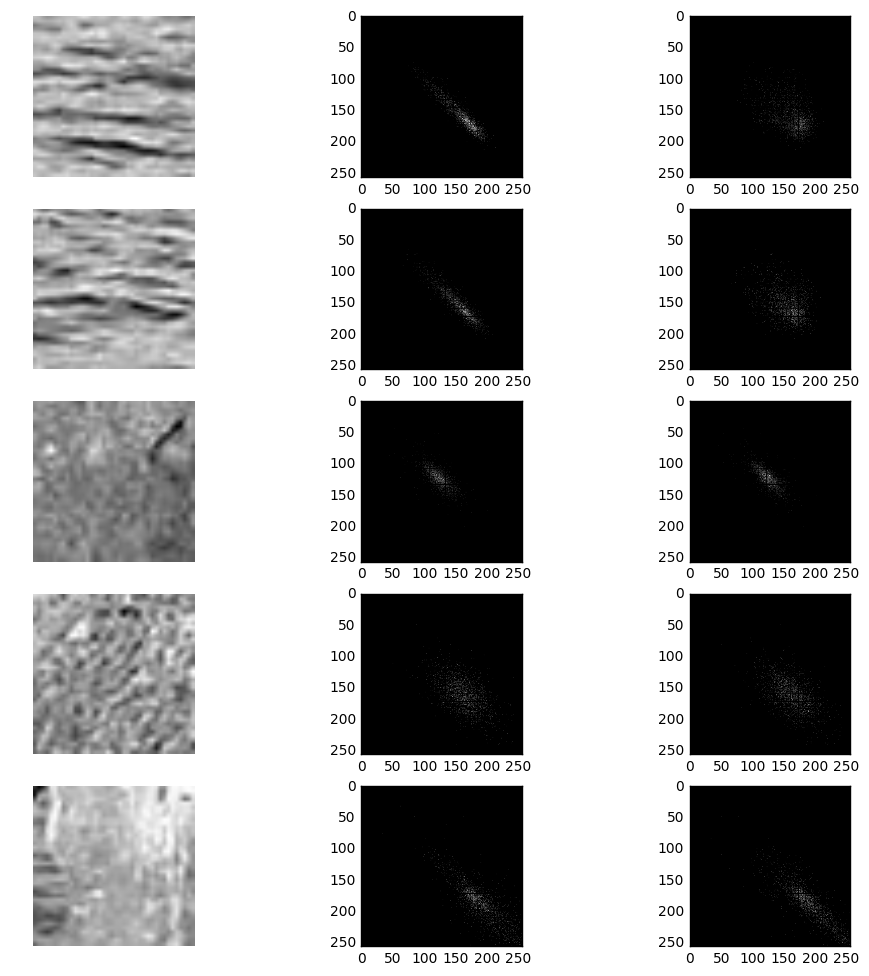

In [4]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('mermaid.png', mode='L')

def get_patch(img, x, y, size = 40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def cooccurrence(img, dx = 1, dy = 1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.zeros((256,256))
    m,n = img.shape
    for y in range(m):
        for x in range(n):
            if 0<=y-dy and y-dy<m and 0<=x+dx and x+dx<n:
                g1 = img[y][x]
                g2 = img[y-dy][x+dx]
                matrix[g1][g2] += 1
    matrix = matrix/(m*n)
            

    return matrix


plt.figure(figsize=(12, 12))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(12, 12))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    plt.subplot(len(patches),3,i+2); plt.imshow(cooccurrence(p,1,0))
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence(p,0,1))
    i += 3
plt.show()

## Assignment 3: Region merging [6 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

1.5


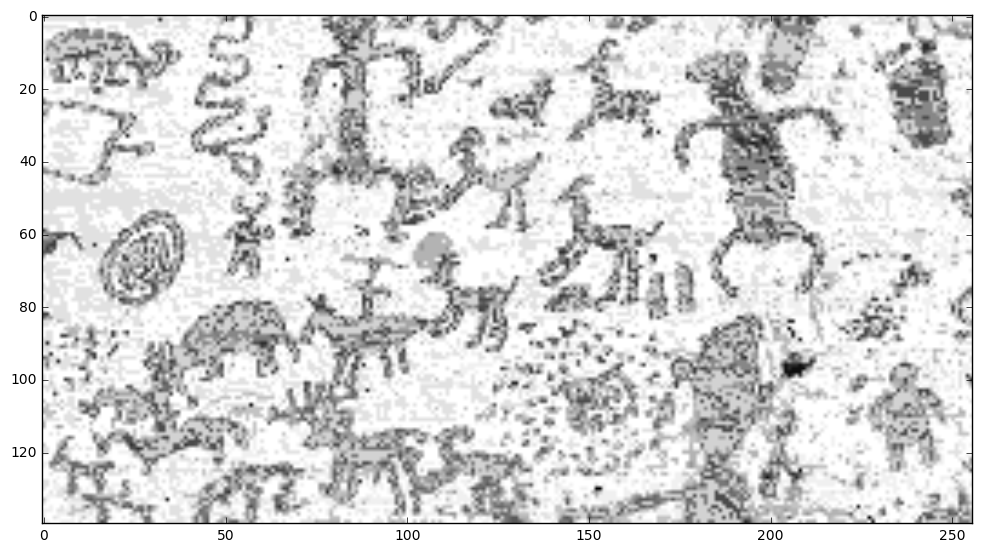

In [5]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

img = misc.imread('segments.png', mode='F')
img = img[:int(img.shape[0]/2),:int(img.shape[1]/2)]
segmented_image = np.empty(img.shape)

def homogeneous(img,s1,s2,h):
    sum1 = 0
    for g1 in s1:
        sum1+=img[g1]
    sum1/=len(s1)
    sum2 = 0
    for g2 in s2:
        sum2+=img[g2]
    sum2/=len(s2)
    return np.abs(sum1-sum2)<h
    
def merge(s,s1,s2):
    s.remove(s1)
    s.remove(s2)
    for ss2 in s2:
        s1.append(ss2)
    s.append(s1)

def segmentize(img):
    segment = []
    for i in range(len(img)):
        for j in range(len(img[i])):
            segment.append([(i,j)])
    return segment

segment = segmentize(img)
def region_merge(img, h, segment, t):
    t = 0
    for i,j in ((ii,jj) for ii in range(len(segment)) for jj in range(ii+1,len(segment))):
        if homogeneous(img,segment[i],segment[j],h):
            t = 1
            merge(segment,segment[i],segment[j])
            break
    return t
            
                
t=1
while t==1:
    t = region_merge(img, 5, segment, t)

n=0
for s in segment:
    for ss in s:
        segmented_image[ss] = n
    n+=1
    
    
        

plt.figure(figsize=(12, 12))
plt.gray()
plt.imshow(segmented_image)
plt.show()

In [6]:
len(segment)

18

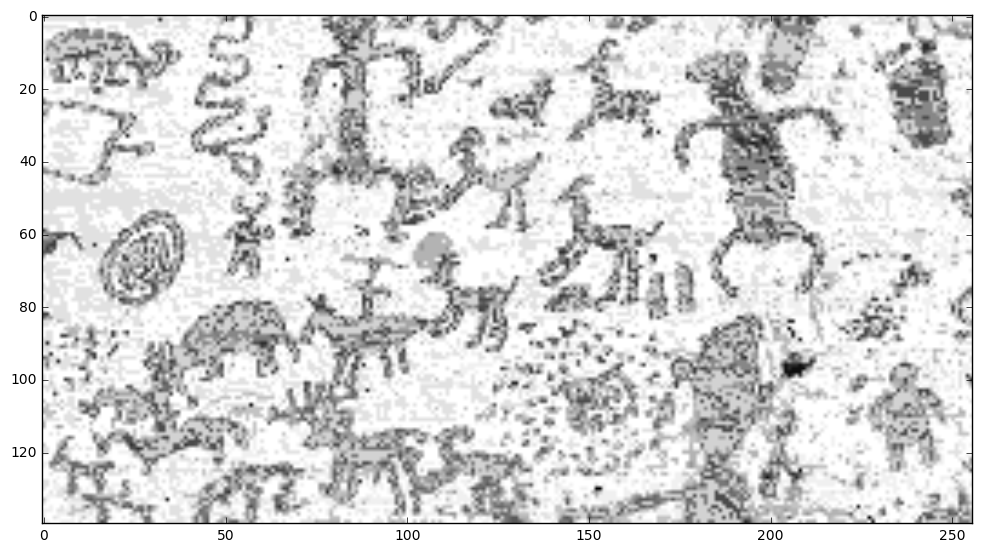

In [12]:
n=0
segmented_image_copy = np.empty(img.shape)
# segmented_image_copy = segmented_image.copy()
for s in segment:
    for ss in s:
        segmented_image_copy[ss] = n
    n+=5
    
plt.figure(figsize=(12, 12))
plt.gray()
plt.imshow(segmented_image_copy)
plt.show()